作業1：選 Kaggle 之 "Skin Cancer MNIST: HAM10000" 

1. 重要性: 皮膚癌之影像辨識。有圖，文，數字兼具的資料，可學習對多類別資料的處理方式。另外家族有皮膚癌史，學習預測資料後，也可自我分析皮膚癌的可能性。

2. 資料源：https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000 。源於哈佛大學Tschandl P. 和 Rosendahl, C. 和 Kittler, H 三位，想以機器學習由影像和人資來自動診斷皮膚癌，所發表的 "The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions" 論文中使用的資料庫。圖庫和人資來自於對病人和非病人的皮膚斑點和人資蒐集。至於答案，跟能由普通人標記的物件偵測不同，得經過組織學理確認 (histo)，持續檢查 (follow up)，專家共識 (consensus) 或體內顯微鏡確認 (confocal) 等種種專業確認後才判定的標準答案，是難得可貴的資料。

3. 資料型式：csv 格式的人資，和皮膚斑點照片，是圖文數字兼具的資料。

4. 評估：目標是由人資和圖片判定該人有皮膚癌的可能性，也就是分類 Y/N 皮膚癌的分類法。我們可切割資料庫分訓練集和測試集。以訓練集訓練分類法，測試集評估分類法。

5. 解決方式：初期可能是經過各項統計方式估計人資與圖片跟皮膚癌的相關性，取高相關性參數以各分類法找出最佳的分辨皮膚癌法。但圖片資訊不容易量化出特徵數據加入統計資料，可能先以 edge filter 取得形狀資訊，以一般常見的觀點提取特徵-斑點是否近似圓或橢圓，邊緣是否光滑，大小等作為特徵。之後將圖形轉化後的特徵跟人資合併，找是否為皮膚癌的相關性。後期學習後 CNN 後，將人資與圖片都作為 CNN input，設計 CNN model，並以該資料庫訓練和驗證。

作業2：透過數據分析提升自由載客車隊業績

1. 核心問題：如何使車隊成員，有最短的出車路徑，和最多的載客率，和儘可能的最高跳表收入。

2. 資料來源
   . 地區的叫車紀錄
     司機個資: 車種, 車齡, 車內外照片, 開車者性別年紀, 熟客率
     出車任務: 車隊分配, 自由攬客
     坐車者個資: 性別。非會員者其他項因為隱私權很難取得. 但會員有個資，可讓我們分析，年齡，職業是否影響叫車頻率。
     出車區：哪些區域特別需要叫車？餐廳，酒吧，無公眾交通系統處？出車與發車者距離
     叫車者個資：大樓警衛代叫車? 診所代叫車? 酒吧或餐廳代叫車？或是本人叫車?
     到站區：住所? 商用大樓? 醫院? 可以在該處推廣叫車服務或優惠
     時間：叫車之日期與時段
   . 問卷: 個資, 叫車理由, 付費形式 (跳表, 約定)
     
3. 資料型態
   文字與數據，和出車者車內外照片

4. 在各區各時段配置多少司機，將有最高業績 ?
   . 可單純就過去地區叫車紀錄，作上述司機人力配置, 調整到最高業績 (訓練)
   . 之後依此配置，與過去未配置的總收入比較，評斷是否能衝高業績

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = sum(abs(y - yp)) / len(y)
    return mae

In [33]:
def mean_squared_error(y, yp):
    """
    請完成這個 Function 後往下執行
    計算 MSE
    Args:
      - y: 實際值
      - yp: 預測值
    Return:
      - mse: MSE
    """
    mse = sum((y-yp)**2)/len(y)
    return mse

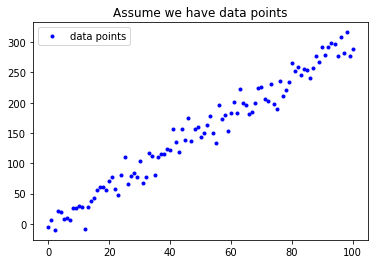

In [34]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

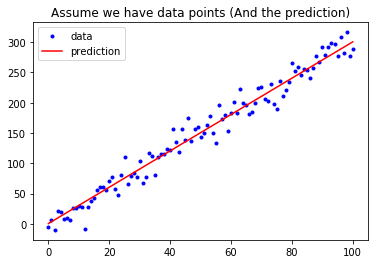

In [35]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [36]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 240.935
The Mean absolute error is 12.246
